# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [31]:
import pickle
from sklearn.model_selection import train_test_split

training_file = "../traffic_sign_data/train.p"
testing_file = "../traffic_sign_data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
    
X_not_test, y_not_test = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

#NOTE: I am using the original dataset provided and not the revamped one. 
#I'm not sure why the dataset changed midway through the term, but it _really_ screwed with my project.
#I spent several days tearing my code apart trying to figure out why the accuracy dropped so badly and
#it turns out that the dataset was modified without any adequate notification (I'm told it was mentioned 
#on slack, but I don't read every slack message). So after wasting several days of work debugging I reverted
#to the original dataset. I think messing with the dataset like this (and failing to notify people and 
#update the course materials - the LeNet for traffic signs video is now wrong) is enormously unprofessional...
X_train, X_valid, y_train, y_valid = train_test_split(X_not_test, y_not_test, test_size=0.11247, random_state=42)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [32]:
n_train = "{:,}".format(y_train.size)
n_test = "{:,}".format(y_test.size)
n_valid = "{:,}".format(y_valid.size)

final_width = 0
final_height = 0
for image in train['features']:
    width = 0
    for pix_width in image:
        width += 1
        height = 0
        for pix_height in pix_width:
            height += 1
            
        if final_height == 0:
            final_height = height
        else:
            assert final_height == height
    if final_width == 0:
        final_width = width
    else:
        assert final_width == width

image_shape = (final_height, final_width)

classes = set(train['labels'])
classes.update(test['labels']) # paranoia about test set and train set not having same labels
n_classes = len(classes)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34,799
Number of testing examples = 12,630
Number of validation examples = 4,410
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

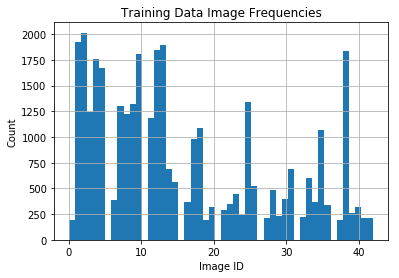

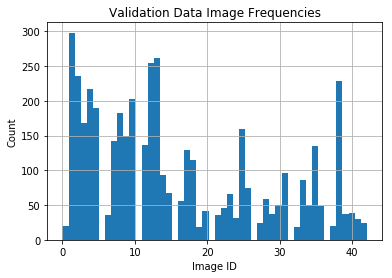

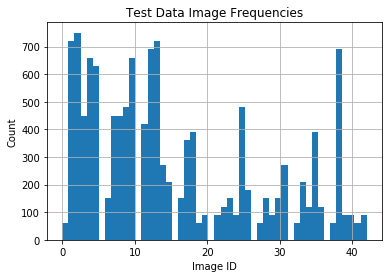

0: Speed limit (20km/h)


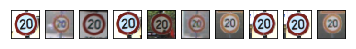

1: Speed limit (30km/h)


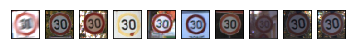

2: Speed limit (50km/h)


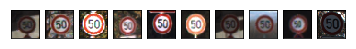

3: Speed limit (60km/h)


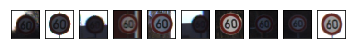

4: Speed limit (70km/h)


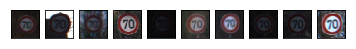

5: Speed limit (80km/h)


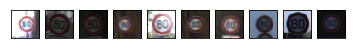

6: End of speed limit (80km/h)


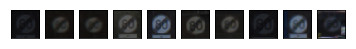

7: Speed limit (100km/h)


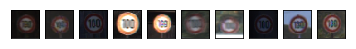

8: Speed limit (120km/h)


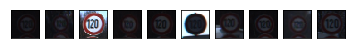

9: No passing


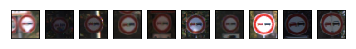

10: No passing for vehicles over 3.5 metric tons


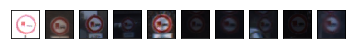

11: Right-of-way at the next intersection


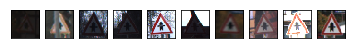

12: Priority road


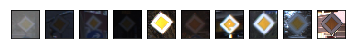

13: Yield


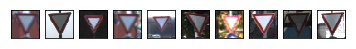

14: Stop


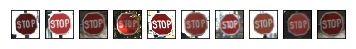

15: No vehicles


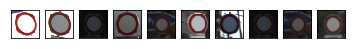

16: Vehicles over 3.5 metric tons prohibited


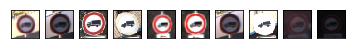

17: No entry


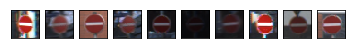

18: General caution


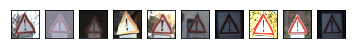

19: Dangerous curve to the left


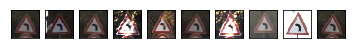

20: Dangerous curve to the right


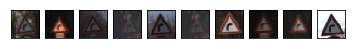

21: Double curve


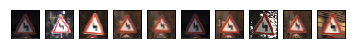

22: Bumpy road


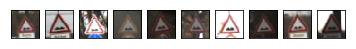

23: Slippery road


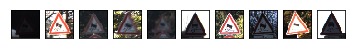

24: Road narrows on the right


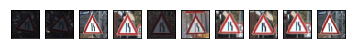

25: Road work


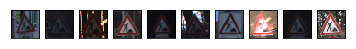

26: Traffic signals


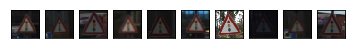

27: Pedestrians


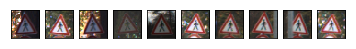

28: Children crossing


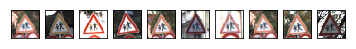

29: Bicycles crossing


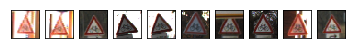

30: Beware of ice/snow


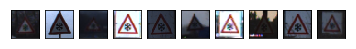

31: Wild animals crossing


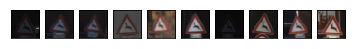

32: End of all speed and passing limits


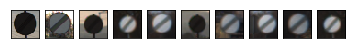

33: Turn right ahead


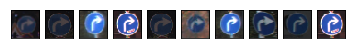

34: Turn left ahead


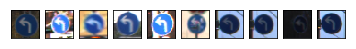

35: Ahead only


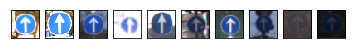

36: Go straight or right


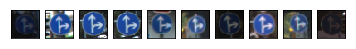

37: Go straight or left


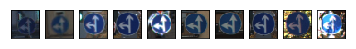

38: Keep right


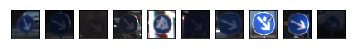

39: Keep left


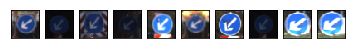

40: Roundabout mandatory


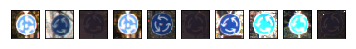

41: End of no passing


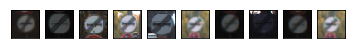

42: End of no passing by vehicles over 3.5 metric tons


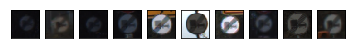

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from pandas.io.parsers import read_csv

%matplotlib inline

plt.hist(y_train, 50)
plt.xlabel('Image ID')
plt.ylabel('Count')
plt.grid(True)
plt.title('Training Data Image Frequencies')
plt.show()

plt.hist(y_valid, 50)
plt.xlabel('Image ID')
plt.ylabel('Count')
plt.grid(True)
plt.title('Validation Data Image Frequencies')
plt.show()

plt.hist(y_test, 50)
plt.xlabel('Image ID')
plt.ylabel('Count')
plt.grid(True)
plt.title('Test Data Image Frequencies')
plt.show()

signnames = read_csv("signnames.csv").values[:, 1]

num_samples_per_class = 10

for i in range(n_classes):
    print(str(i) + ": " + signnames[i])
    indices = np.where(y_train == i)[0]
    chosen_samples = np.random.choice(indices, num_samples_per_class)
    fig = plt.figure()
    for i in range(len(chosen_samples)):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[chosen_samples[i]])
    plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
import tensorflow as tf
from sklearn.utils import shuffle
import cv2

'''
This turned out to be a big mistake. The additional processing time completely killed my
throughput so I abandoned this in favour of a batch pre-processing step. It's more efficient
but less robust...

def normalise_test_imgs(imgs):
    for img in imgs:
        height = 32
        width = 32
        depth = 3
        
        img = tf.image.per_image_standardization(img)
        img.set_shape([height, width, depth])
        
    return imgs

def distort_training_imgs(imgs):
    for img in imgs:
        height = 32
        width = 32
        depth = 3
        
        img = tf.random_crop(img, [height, width, depth])
        img = tf.image.random_flip_left_right(img)
        img = tf.image.random_brightness(img, max_delta=63)
        img = tf.image.random_contrast(img, lower=0.2, upper=1.8)
        img = tf.image.per_image_standardization(img)
        img.set_shape([height, width, depth])
        
    return imgs
    ''' 

#the "augment_brightness_camera_images" and "transform_image" functions in this code cell are not my own work
# I borrowed them from https://github.com/vxy10/ImageAugmentation/blob/master/img_transform_NB.ipynb
# I was searching around for some image transformation code after I realised the built-in tensorflow
# functions weren't appropriate. I found these functions and tried them out and I think they work
# quite well. I could re-implement them myself if anybody feels strongly about that sort of thing,
# but really I would think that's just busy work...

import cv2
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range):

    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    
    # Brightness 
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    img = augment_brightness_camera_images(img)
    
    return img

Pre-processing 34799 examples.
distorting and augmenting...
...distorted and agumented.
shuffling...
...shuffled.
normalizing...
...normalized.
Final training set has 453564 examples.


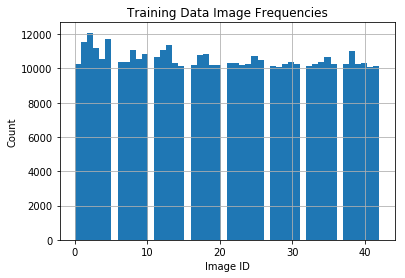

In [5]:
#...back to code that I actually wrote!
def augment_dataset(imgs, labels, num_augmentations = 5):
    '''
    Takes the set of training images and applies some random transformations to augment the dataset.
    The augmentation is weighted to produce more examples that occur less frequently in the original 
    dataset, in an effort to avoid issues with sparse data or with training the model to favour certain
    signs over others simply because they occur more frequently.
    '''
    imgs_out = []
    labels_out = []
    
    label_counts = {}
    max_count = 0
    for label in labels:
        label_counts[label] = label_counts.get(label, 0) + 1
        if label_counts[label] > max_count:
            max_count = label_counts[label]
            
    target = max_count * num_augmentations
    
    for i in range(len(imgs)):
        imgs_out.append(imgs[i])
        labels_out.append(labels[i])
        for j in range(int(target/label_counts[labels[i]])):
            imgs_out.append(transform_image(imgs[i],20,10,5))
            labels_out.append(labels[i])
    return imgs_out, labels_out

print("Pre-processing " + str(len(X_train)) + " examples.")
print("distorting and augmenting...")
distorted_imgs, distorted_labels = augment_dataset(X_train, y_train)
print("...distorted and agumented.")

print("shuffling...")
X_train, y_train = shuffle(np.array(distorted_imgs), np.array(distorted_labels))
print("...shuffled.")

print("normalizing...")
X_train = (X_train - 127.5) / 127.5
X_valid = (X_valid - 127.5) / 127.5
X_test = (X_test - 127.5) / 127.5
print("...normalized.")

print("Final training set has " + str(len(X_train)) + " examples.")

plt.hist(y_train, 50)
plt.xlabel('Image ID')
plt.ylabel('Count')
plt.grid(True)
plt.title('Training Data Image Frequencies')
plt.show()


### Model Architecture

In [6]:
from tensorflow.contrib.layers import flatten

def traffic_sign_classifier(x):
    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x3. Output = 14x14x20.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(8, 8, 3, 20), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(20))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 2, 2, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 14x14x20. Output = 7x7x20.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 5x5x400.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 20, 400), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(400))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 5x5x400. Output = 2x2x400.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 4x4x400.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 400, 400), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(400))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b

    # Activation.
    conv3 = tf.nn.relu(conv3)

    # Pooling. Input = 4x4x400. Output = 4x4x400.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 1, 1, 1], strides=[1, 1, 1, 1], padding='VALID')
    conv3 = tf.nn.dropout(conv3, 0.5)

    # SOLUTION: Flatten. Input = 4x4x400. Output = 400.
    fc0   = flatten(conv3)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_b = tf.Variable(tf.zeros(120))
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, 0.5)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, 0.5)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = n_classes (43).
    fc3_b  = tf.Variable(tf.zeros(43))
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
from time import gmtime, strftime

print("Evaluating model...")
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

x = tf.placeholder(tf.float32, (None, 32, 32, 3)) #assuming colour images
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001
beta = 0.01
EPOCHS = 50
BATCH_SIZE = 882


logits = traffic_sign_classifier(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate = rate) 
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0.0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...\n")

    for i in range(EPOCHS):
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
        print()
        
    saver.save(sess, 'traffic2')
    print("Model saved")
    print("Training complete.")
    print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
    
    print("Evaluating against test set...")
    final_accuracy = evaluate(X_test, y_test)
    print(final_accuracy)
    print("Evaluation complete.")


Evaluating model...
2017-03-04 22:33:02
Training...

EPOCH 1 ...
Validation Accuracy = 0.326
2017-03-04 22:35:05

EPOCH 2 ...
Validation Accuracy = 0.540
2017-03-04 22:37:04

EPOCH 3 ...
Validation Accuracy = 0.673
2017-03-04 22:38:46

EPOCH 4 ...
Validation Accuracy = 0.757
2017-03-04 22:40:33

EPOCH 5 ...
Validation Accuracy = 0.815
2017-03-04 22:42:22

EPOCH 6 ...
Validation Accuracy = 0.856
2017-03-04 22:44:03

EPOCH 7 ...
Validation Accuracy = 0.886
2017-03-04 22:45:44

EPOCH 8 ...
Validation Accuracy = 0.907
2017-03-04 22:47:32

EPOCH 9 ...
Validation Accuracy = 0.915
2017-03-04 22:49:29

EPOCH 10 ...
Validation Accuracy = 0.936
2017-03-04 22:51:23

EPOCH 11 ...
Validation Accuracy = 0.940
2017-03-04 22:53:13

EPOCH 12 ...
Validation Accuracy = 0.939
2017-03-04 22:55:26

EPOCH 13 ...
Validation Accuracy = 0.943
2017-03-04 22:57:47

EPOCH 14 ...
Validation Accuracy = 0.948
2017-03-04 22:59:52

EPOCH 15 ...
Validation Accuracy = 0.956
2017-03-04 23:01:51

EPOCH 16 ...
Validation Ac

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

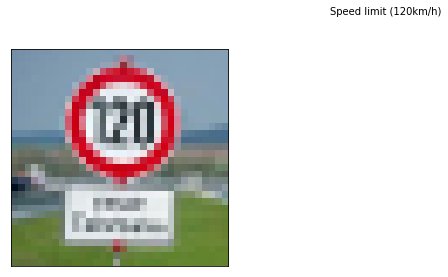

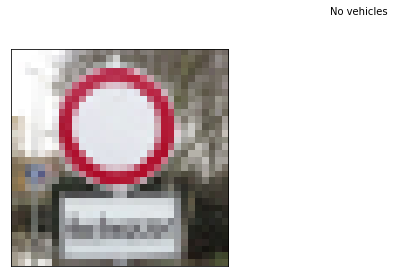

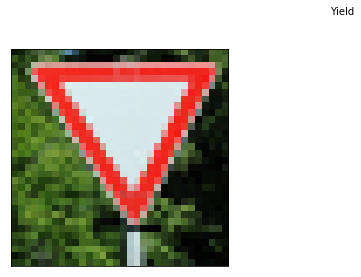

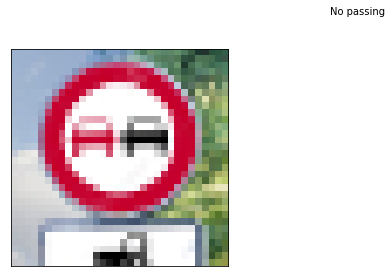

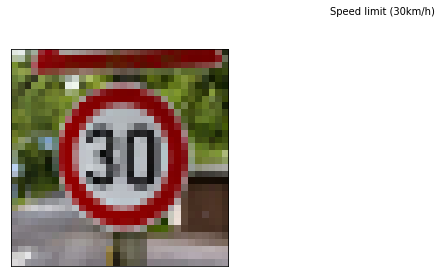

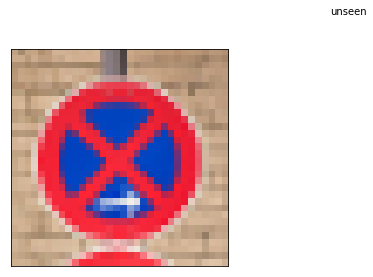

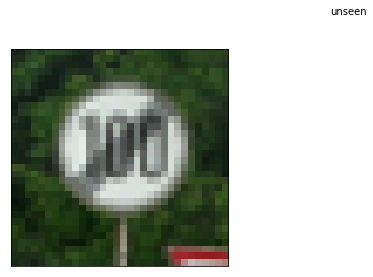

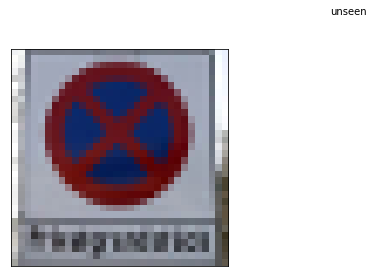

In [44]:
import matplotlib.image as mpimg

new_data = []
for i in range(1,9):
    new_data.append(mpimg.imread("../downloaded_signs/pre-processed/sign" + str(i) + ".jpg"))
labels = [8, 15, 13, 9, 1, 101, 102, 103]

for i in range(len(new_data)):
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
    axis.imshow(new_data[i])
    if labels[i] < 43:
        caption = signnames[labels[i]]
    else:
        caption = "unseen"
    fig.text(1,1,caption)
    plt.show()




### Predict the Sign Type for Each Image

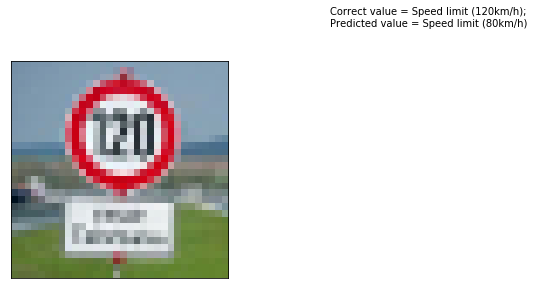

-----------------------------------------------------------------------------------


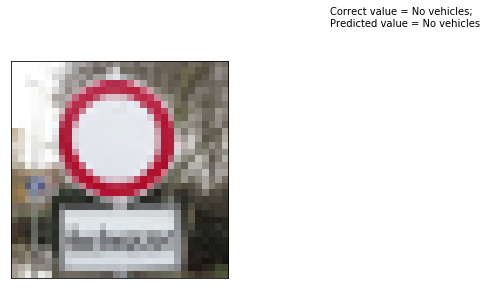

-----------------------------------------------------------------------------------


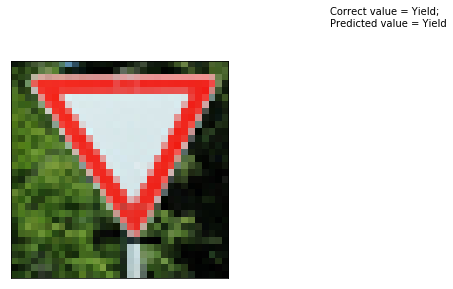

-----------------------------------------------------------------------------------


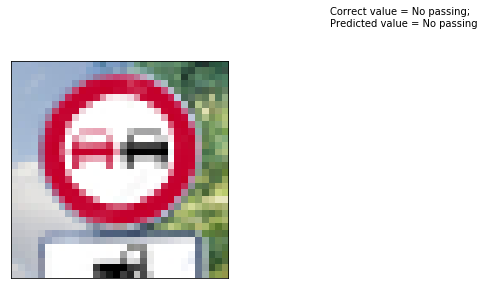

-----------------------------------------------------------------------------------


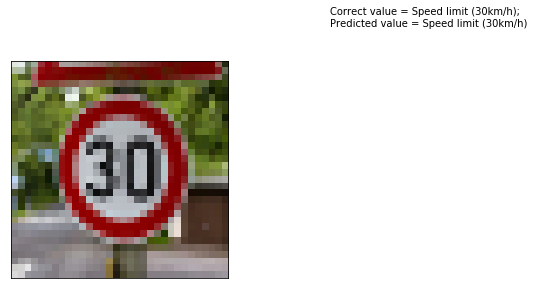

-----------------------------------------------------------------------------------


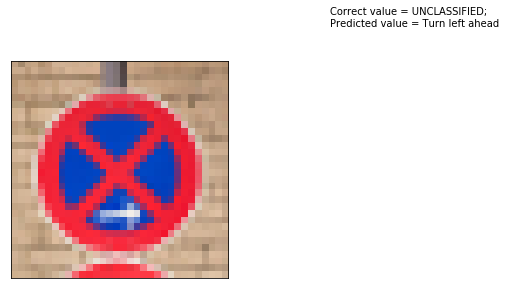

-----------------------------------------------------------------------------------


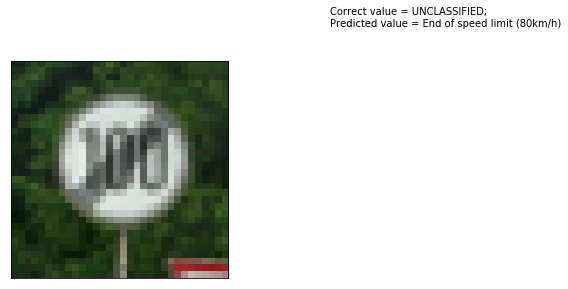

-----------------------------------------------------------------------------------


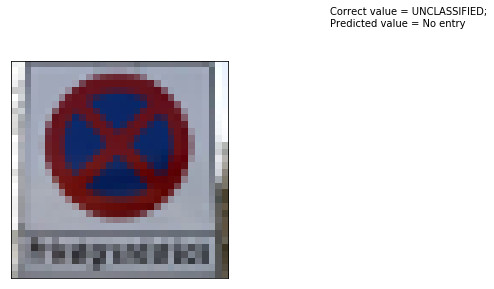

-----------------------------------------------------------------------------------


In [45]:
new_data_normalized = (np.array(new_data) - 127.5) / 127.5

with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('traffic.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    predictions = sess.run([tf.argmax(logits,1)],feed_dict={x: new_data_normalized})[0]
    
for i in range(len(predictions)):
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
    axis.imshow(new_data[i])
    if labels[i] < 43:
        correct = signnames[labels[i]]
    else:
        correct = "UNCLASSIFIED"
    fig.text(1,1,"Correct value = " + correct + ";\nPredicted value = " + signnames[predictions[i]] )
    plt.show()
    print("-----------------------------------------------------------------------------------")


### Analyze Performance

In [46]:
def prevaluate(X_data, y_data):
    num_examples = len(X_data)
    print(num_examples)
    print(y_data)
    total_accuracy = 0.0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    print(total_accuracy)
    return total_accuracy / num_examples

with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('traffic.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    print("Accuracy for the 5 previously-seen images: " + str(prevaluate(new_data_normalized[:5], labels[:5])))
    print("The 3 images that don't appear in the original dataset obviously weren't classified correctly and so they weren't included in this evaluation step.")


5
[8, 15, 13, 9, 1]
4.0000000596
Accuracy for the 5 previously-seen images: 0.800000011921
The 3 images that don't appear in the original dataset obviously weren't classified correctly and so they weren't included in this evaluation step.


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [48]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('traffic2.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    
    topk = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 5), feed_dict={x: new_data_normalized})
    
for i in range(len(topk.values)):
    if labels[i] < 43:
        caption = signnames[labels[i]]
    else:
        caption = "unseen"
    print("Image " + str(i) + ". Correct value: " + caption)
    for j in range(len( topk.values[i])):
        print(signnames[topk.indices[i][j]] + ": {:.3f}".format(topk.values[i][j]))
    print("-----")
  

Image 0. Correct value: Speed limit (120km/h)
Speed limit (50km/h): 0.487
Speed limit (30km/h): 0.274
Speed limit (100km/h): 0.071
Speed limit (70km/h): 0.054
Speed limit (80km/h): 0.024
-----
Image 1. Correct value: No vehicles
No vehicles: 1.000
Bumpy road: 0.000
Bicycles crossing: 0.000
Yield: 0.000
Speed limit (60km/h): 0.000
-----
Image 2. Correct value: Yield
Yield: 1.000
Speed limit (20km/h): 0.000
Speed limit (30km/h): 0.000
Speed limit (50km/h): 0.000
Speed limit (60km/h): 0.000
-----
Image 3. Correct value: No passing
No passing: 1.000
Speed limit (20km/h): 0.000
Speed limit (30km/h): 0.000
Speed limit (50km/h): 0.000
Speed limit (60km/h): 0.000
-----
Image 4. Correct value: Speed limit (30km/h)
Speed limit (30km/h): 0.968
Speed limit (50km/h): 0.024
Speed limit (70km/h): 0.007
Speed limit (100km/h): 0.000
No vehicles: 0.000
-----
Image 5. Correct value: unseen
Keep right: 0.567
Turn left ahead: 0.145
Ahead only: 0.085
Right-of-way at the next intersection: 0.044
Road work: 0

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 